## HEART DISEASE 
Cardiovascular diseases are considered as a leading cause of death globally. A large set of victims of CVD(Cardiovascular Disease) attribute their demise owing to either heart disease or stroke & in recent years such CVDs are observed even in people below 70yrs of age. The dataset contains 11 such features of patients who suffer from CVD to help predict a possible CVD due to heart disease.

In [2]:
import opendatasets as od
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
import seaborn as sns

In [4]:
res = od.download_kaggle_dataset('https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction',data_dir='Datasets')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:

/Users/subhadeepsikdar/Desktop/Python/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


100%|██████████| 8.56k/8.56k [00:00<00:00, 5.04MB/s]

In [8]:
import glob

Here we make use of **glob** to find all files within a directory containing a **.csv** extension in it.

In [9]:
os.getcwd()

'/Users/subhadeepsikdar/Desktop/Python'

In [10]:
res = glob.glob(pathname='/Users/subhadeepsikdar/Desktop/Python/Datasets/**/*.csv',recursive=True)

In [11]:
print(f"There are {len(res)} csv files currently within Datasets folder")

There are 2 csv files currently within Datasets folder


In [12]:
res

['/Users/subhadeepsikdar/Desktop/Python/Datasets/AB_NYC_2019.csv',
 '/Users/subhadeepsikdar/Desktop/Python/Datasets/heart-failure-prediction/heart.csv']

In [13]:
heartdisease_df = pd.read_csv(res[-1])
heartdisease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
heartdisease_df.shape

(918, 12)

From above we see there exists 918 observations and each having 12 features.

Let us get the summary statistics of all the numerical features.

In [15]:
heartdisease_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the **Cholestrol** reading we see that top 25% of the population has level >=267 mm/dL where a value >=240 mm/dL is considered high and puts one in line for a potential
heart attack.

Looking at the **FastingBS** values where with FastingBS value > 120 mg/dL indicated by 1 & 0 otherwise we observe that for majority of the population it remains below the level.

The values for **RestingBP** which measures the **systolic pressure** i.e. force with which heart contracts and pumps blood into the arteries ,about half of the population suffers from **Hypertension/High Blood Pressure**.

Let's see if there exists any missing values in which case we impute values prior to EDA.

In [16]:
heartdisease_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
ages_of_subjects = list(heartdisease_df.Age.unique())
print(f"All subjects in the dataset has age in the range {min(ages_of_subjects)} to {max(ages_of_subjects)} yrs")

All subjects in the dataset has age in the range 28 to 77 yrs


### VISUALIZE DISTRIBUTION OF SUBJECTS WITH AND WITHOUT HEART DISEASE
Display histogram of subjects suffering from heart disease and are normal.

In [21]:
print("Number of unique values/categories of various features")
heartdisease_df.nunique()


Number of unique values/categories of various features


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

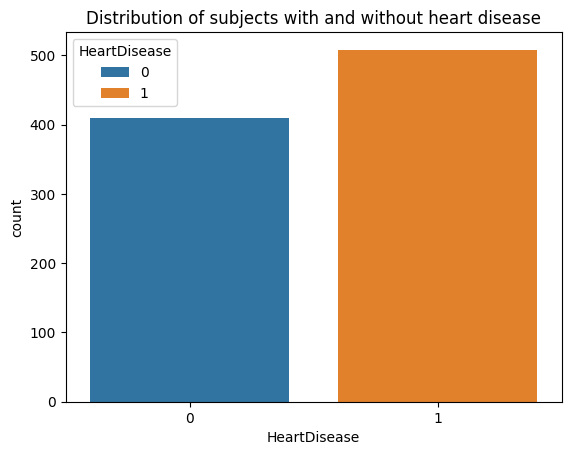

In [23]:
sns.countplot(data=heartdisease_df,x=heartdisease_df['HeartDisease'],hue=heartdisease_df['HeartDisease'])
plt.title("Distribution of subjects with and without heart disease")
plt.show()

In [29]:
subject_distribution_disease = dict(heartdisease_df['HeartDisease'].value_counts())
print(f"{(subject_distribution_disease[1]/len(heartdisease_df))*100:.2f}% of subjects suffer from heart disease")

55.34% of subjects suffer from heart disease


Let us find out the age range of subjects who suffer from heart disease

In [35]:
heartdiseasesubjects_df = heartdisease_df[heartdisease_df['HeartDisease']==1]
nonheartdiseasesubjects_df = heartdisease_df[heartdisease_df['HeartDisease']==0]

In [36]:
heartdiseasesubjects_df.reset_index(inplace=True)
nonheartdiseasesubjects_df.reset_index(inplace=True)

In [37]:
print(f"subjects with heart disease has age range {heartdiseasesubjects_df['Age'].min()} to {heartdiseasesubjects_df['Age'].max()} yrs")
print(f"subjects with no heart disease has age range {nonheartdiseasesubjects_df['Age'].min()} to {nonheartdiseasesubjects_df['Age'].max()} yrs")

subjects with heart disease has age range 31 to 77 yrs
subjects with no heart disease has age range 28 to 76 yrs


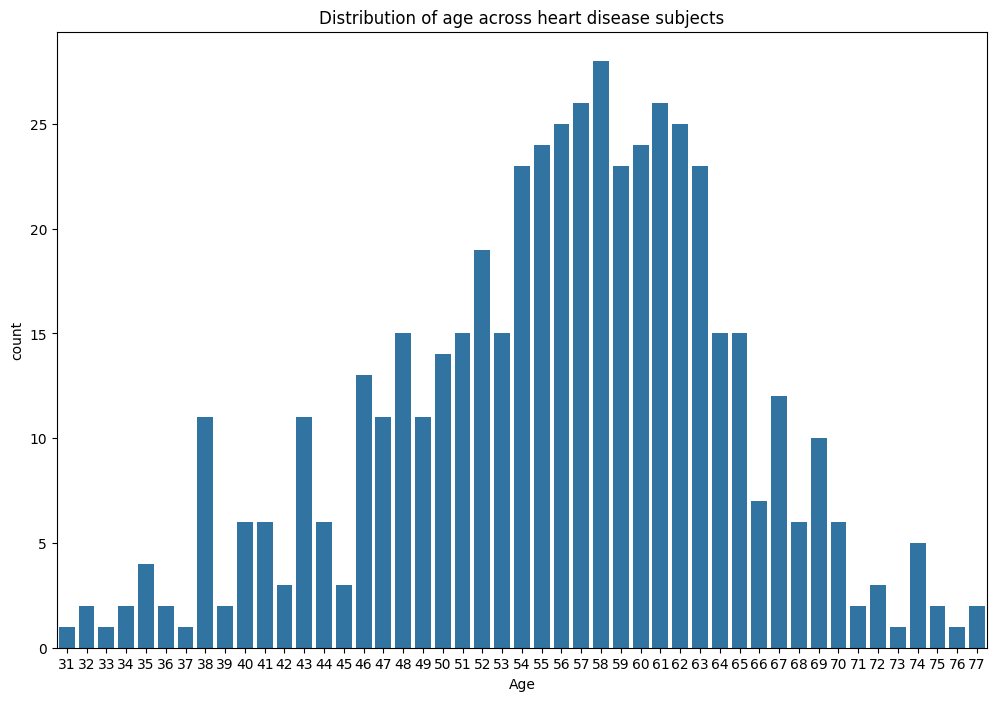

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(data=heartdiseasesubjects_df,x=heartdiseasesubjects_df['Age'])
plt.title("Distribution of age across heart disease subjects")
plt.show()

In [41]:
print(f"The mean age of heart disease subjects is {heartdiseasesubjects_df['Age'].mean()} yrs with {heartdiseasesubjects_df['Age'].std()} yrs variation")

The mean age of heart disease subjects is 55.8996062992126 yrs with 8.727055566369488 yrs variation


Let us look at values of cholestrol,FastingBS, RestingBp, chest-pain type & gender of subjects who suffer from heart disease.

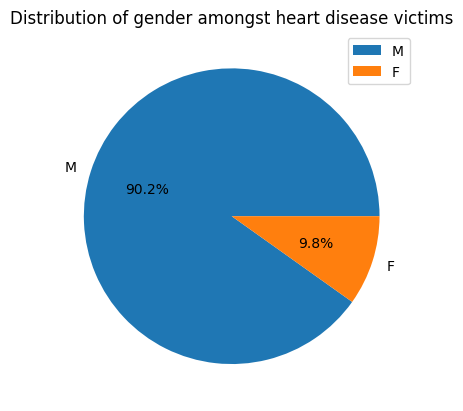

In [73]:
plt.pie(list(heartdiseasesubjects_df['Sex'].value_counts()),labels=list(dict(heartdiseasesubjects_df['Sex'].value_counts()).keys()),autopct="%0.1f%%")
plt.title("Distribution of gender amongst heart disease victims")
plt.legend(list(dict(heartdiseasesubjects_df['Sex'].value_counts()).keys()))
plt.show()

As can be observed above a majority of heart disease victims are male.

Let us look into the cholestrol values of male subjects and compare it with female subjects.

In [60]:
male_victims_cholestrol_ct=dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['Cholesterol'].value_counts())
female_victims_cholestrol_ct=dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['Cholesterol'].value_counts())

In [65]:
print(f"Amongst the male victims the cholesterol values ranges between {min(list(male_victims_cholestrol_ct.keys()))} mm/dL and {max(list(male_victims_cholestrol_ct.keys()))} mm/dL with mean of {np.mean((list(male_victims_cholestrol_ct.keys())))} mm/dL")
print(f"Amongst the female victims the cholesterol values ranges between {min(list(female_victims_cholestrol_ct.keys()))} mm/dL and {max(list(female_victims_cholestrol_ct.keys()))} mm/dL with mean of {np.mean((list(female_victims_cholestrol_ct.keys())))} mm/dL")

Amongst the male victims the cholesterol values ranges between 0 mm/dL and 603 mm/dL with mean of 251.08074534161491 mm/dL
Amongst the female victims the cholesterol values ranges between 0 mm/dL and 409 mm/dL with mean of 273.6111111111111 mm/dL


From above we observe that even though it is predominantly the men who are at risk of developing a heart disease on an average the cholesterol value in female are found
to be higher than male.

This shows that it's not apparent from just observing cholesterol values to figure out whether someone is more susceptible to heart attacks/stroke. Cholesterol which are of 2 types namely LDL(Bad) & HDL(Good) has different outcomes when present in body. While the former blocks arteries thereby blocking blood flow through it resulting in the disease whereas the later reduces concentration of LDL and hence minimises the risk of develoing a heart attack/stroke.



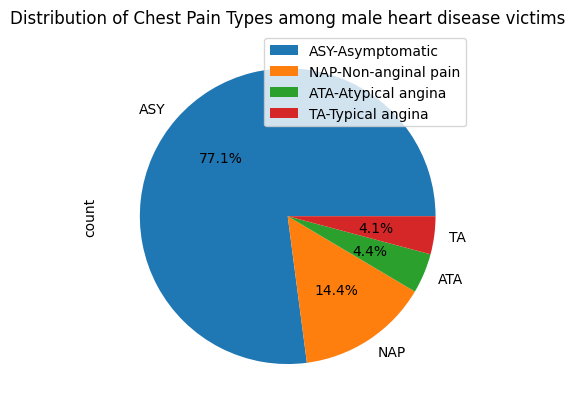

In [ ]:
heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['ChestPainType'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of Chest Pain Types among male heart disease victims")
plt.legend(['ASY-Asymptomatic','NAP-Non-anginal pain','ATA-Atypical angina','TA-Typical angina'])
plt.show()

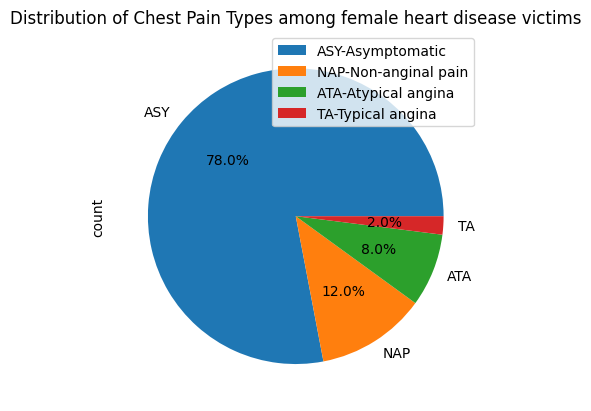

In [72]:
heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['ChestPainType'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of Chest Pain Types among female heart disease victims")
plt.legend(['ASY-Asymptomatic','NAP-Non-anginal pain','ATA-Atypical angina','TA-Typical angina'])
plt.show()

From both the above we find heart-attacks/stroke mostly turns out **ASY** or **Asymptomatic** i.e. shows no manifestation of symtomps in victims both in male as well as female
& hence is often termed as **SILENT KILLER** thereby rendering the disease difficult to diagnose unless periodic measurements are done.

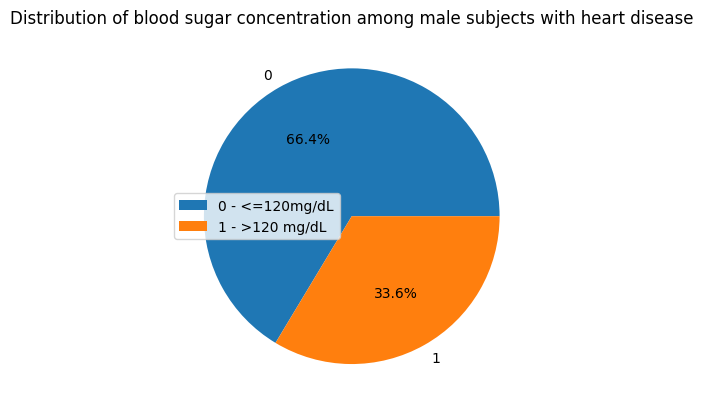

In [85]:
male_victims_fastingBS_ct = dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['FastingBS'].value_counts())
female_victims_fastingBS_ct = dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['FastingBS'].value_counts())

plt.pie(list(male_victims_fastingBS_ct.values()),labels=list(male_victims_fastingBS_ct.keys()),autopct="%0.1f%%")
plt.title("Distribution of blood sugar concentration among male subjects with heart disease")
plt.legend(['0 - <=120mg/dL','1 - >120 mg/dL'])
plt.show()

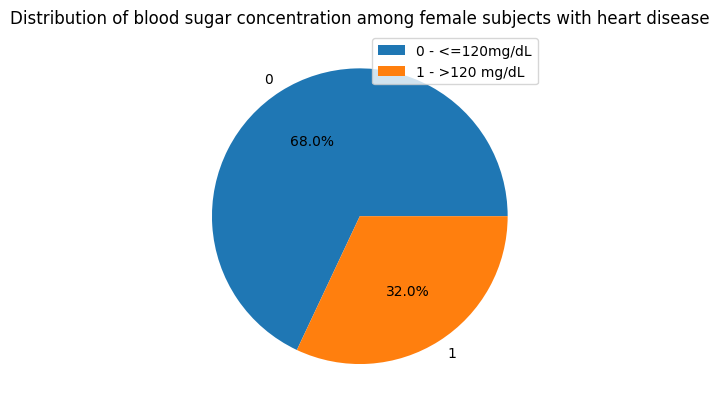

In [87]:
plt.pie(list(female_victims_fastingBS_ct.values()),labels=list(female_victims_fastingBS_ct.keys()),autopct="%0.1f%%")
plt.title("Distribution of blood sugar concentration among female subjects with heart disease")
plt.legend(['0 - <=120mg/dL','1 - >120 mg/dL'])
plt.show()

From above we observe that for both male & female heart disease victims a majority shows lower blood sugar levels which is <=120 mg/dL.

In [88]:
male_victims_restingBP_ct = list(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['RestingBP'])
female_victims_fastingBS_ct = list(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['RestingBP'])

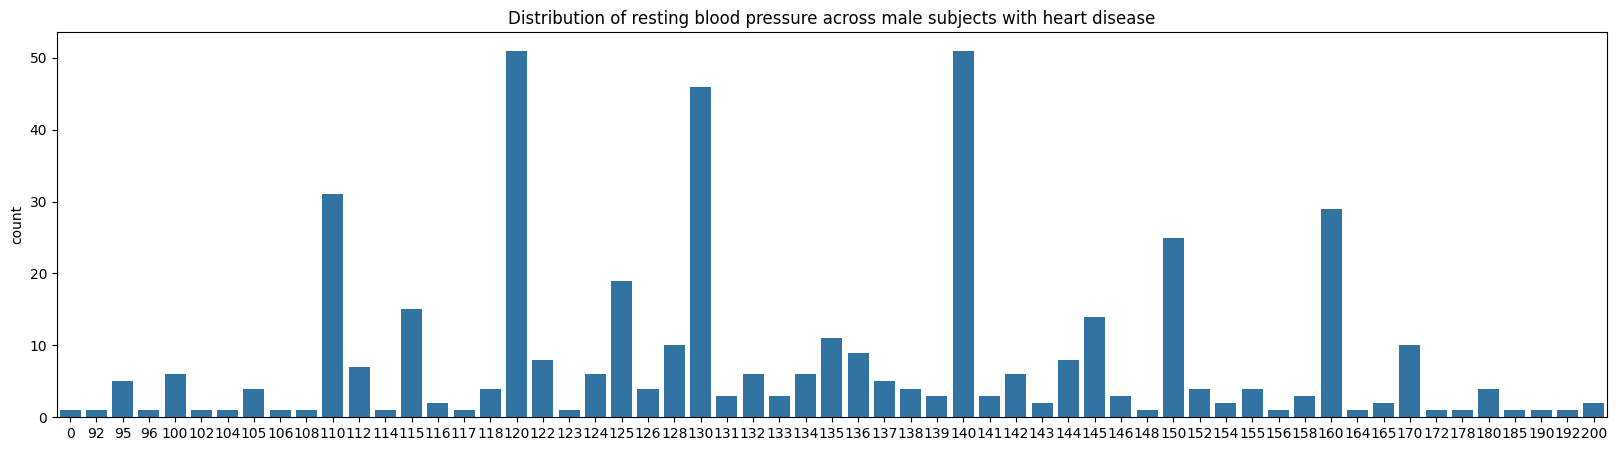

In [92]:
plt.figure(figsize=(20,5))
sns.countplot(x=male_victims_restingBP_ct)
plt.title("Distribution of resting blood pressure across male subjects with heart disease")
plt.show()

Let us form 2 categories of subjects namely one with >120 mm Hg blood pressure and the other <=120 mm Hg. This helps figure out whether blood pressure plays a pivotal role in
indicating whether a person is susceptible to heart-attacks/stroke.

In [93]:
heartdisease_df['CriticalBP'] = heartdisease_df.apply(lambda row:row['RestingBP']>120,axis=1)

In [94]:
heartdisease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,CriticalBP
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,True
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,True
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,True


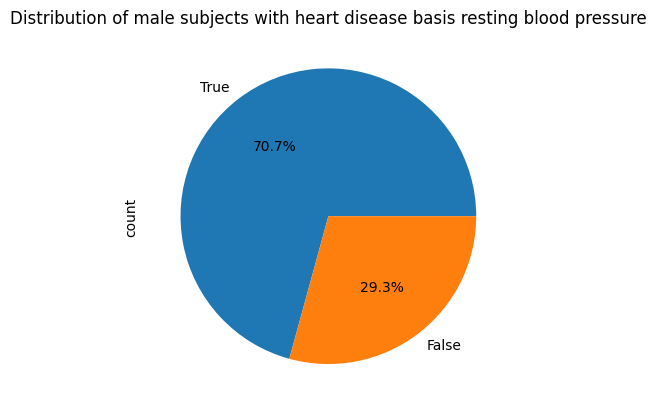

In [97]:
heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['CriticalBP'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of male subjects with heart disease basis resting blood pressure")
plt.show()

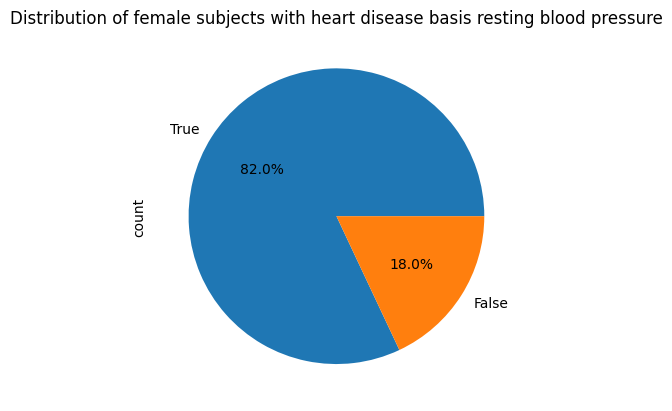

In [98]:
heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]['CriticalBP'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of female subjects with heart disease basis resting blood pressure")
plt.show()

From above we observe that **RestingBP** plays a significant role in determining whether a person suffers from heart-disease. Heart disease victims predominantly suffer
from elevated blood pressure beyond 120 mmHg and such victims are found more among female than male.

Let's look at RestingECG types amongst hear-disease sufferers.

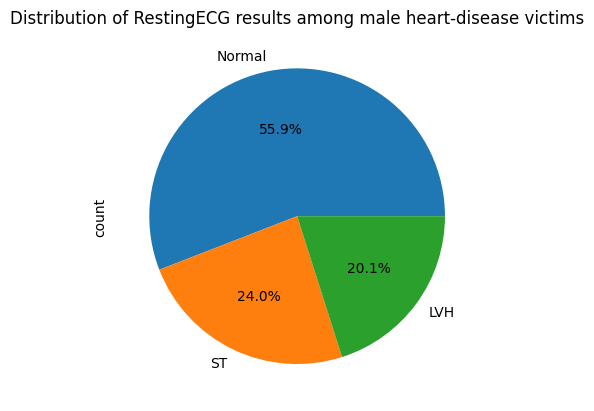

In [103]:
heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['RestingECG'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of RestingECG results among male heart-disease victims")
plt.show()

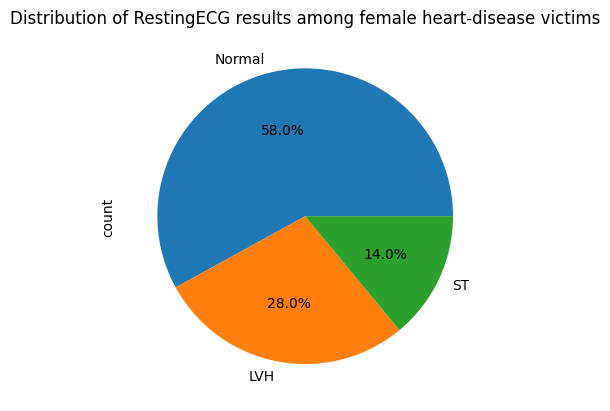

In [102]:
heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]['RestingECG'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of RestingECG results among female heart-disease victims")
plt.show()

From above we observe that most heart-disease sufferers have **Normal** heart rate and hence makes it difficult to diagnose chance of stroke/heart-attack merely basis heart rate.

#### ANALYSIS OF MAX HEART RATE IN SUBJECTS SUFFERING FROM HEART DISEASE

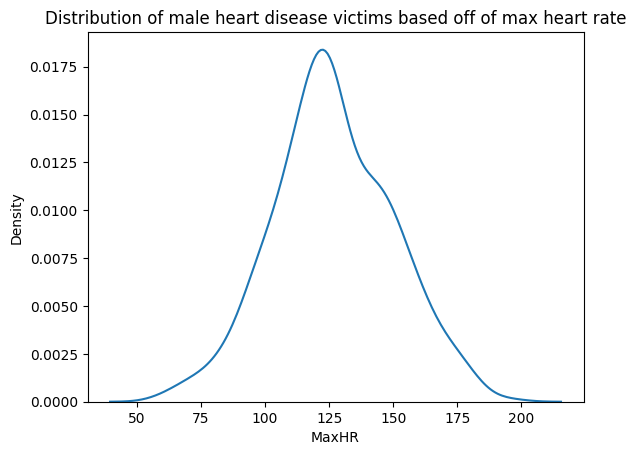

In [121]:


sns.kdeplot(data=pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['MaxHR']),x='MaxHR')
plt.title('Distribution of male heart disease victims based off of max heart rate')
plt.show()

In [117]:
heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['MaxHR'].value_counts()

MaxHR
120    25
140    20
130    19
150    19
125    17
       ..
133     1
77      1
91      1
87      1
90      1
Name: count, Length: 101, dtype: int64